In [ ]:
*** 1.2 Project Planning - EDA & Stats
Develop a foundational understanding of the data, assess its quality, and uncover initial patterns in risk and profitability

Tasks: 
- Bivariate or Multivariate Analysis:
  * Correlations and Associations: Explore relationships between TotalPremium and TotalClaims as a function of ZipCode
  * Data Comparison: Compare insurance metrics over geography (Province, CoverType, Make, etc.)
  * Outlier Detection: Use box plots ****

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

C:\Users\user\AppData\Local\Temp\ipykernel_10484\1757666852.py:4: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, delimiter='|')


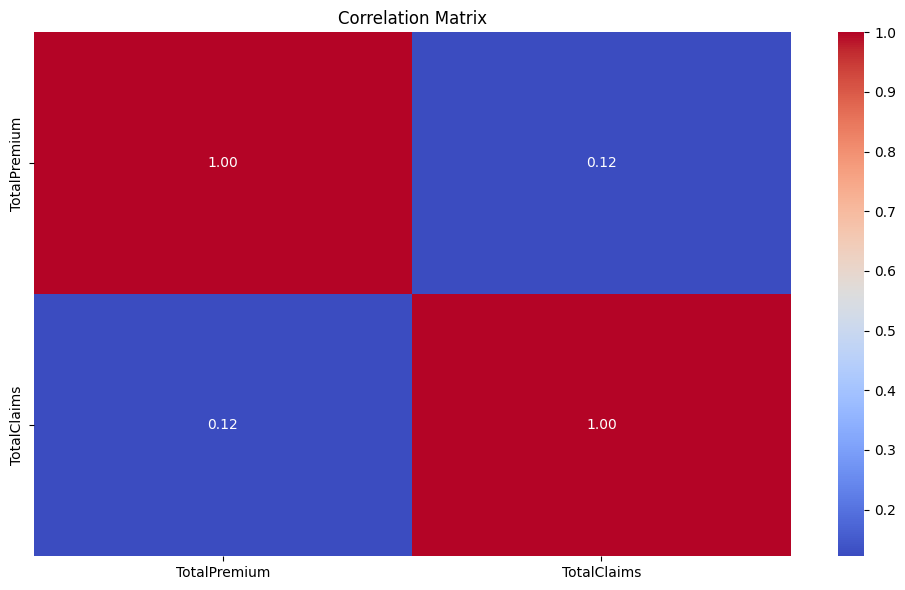

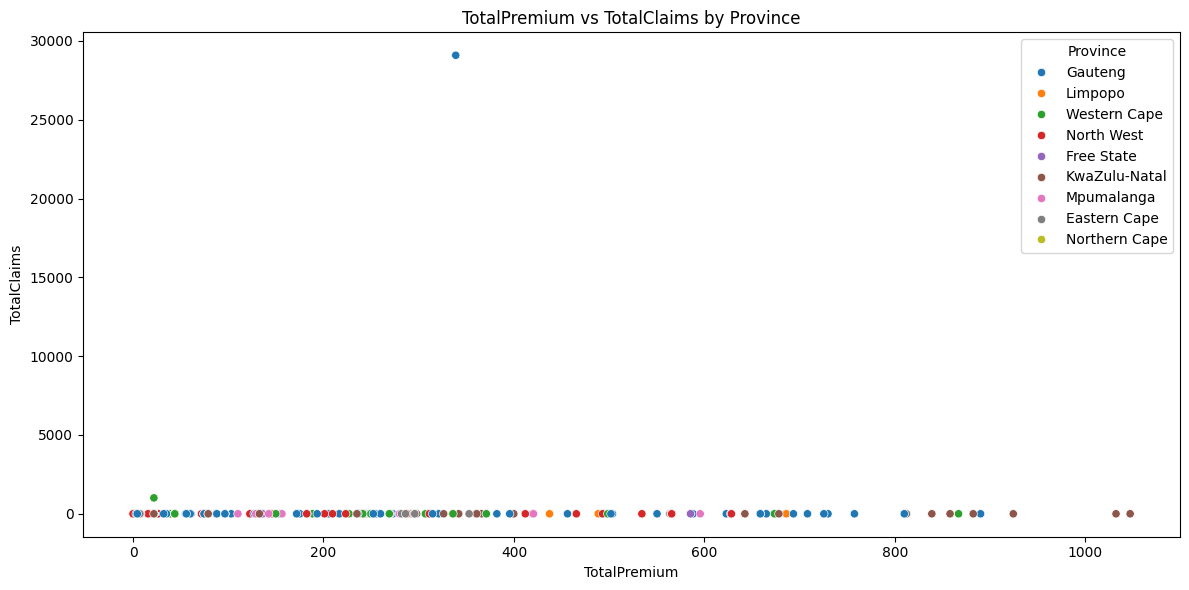

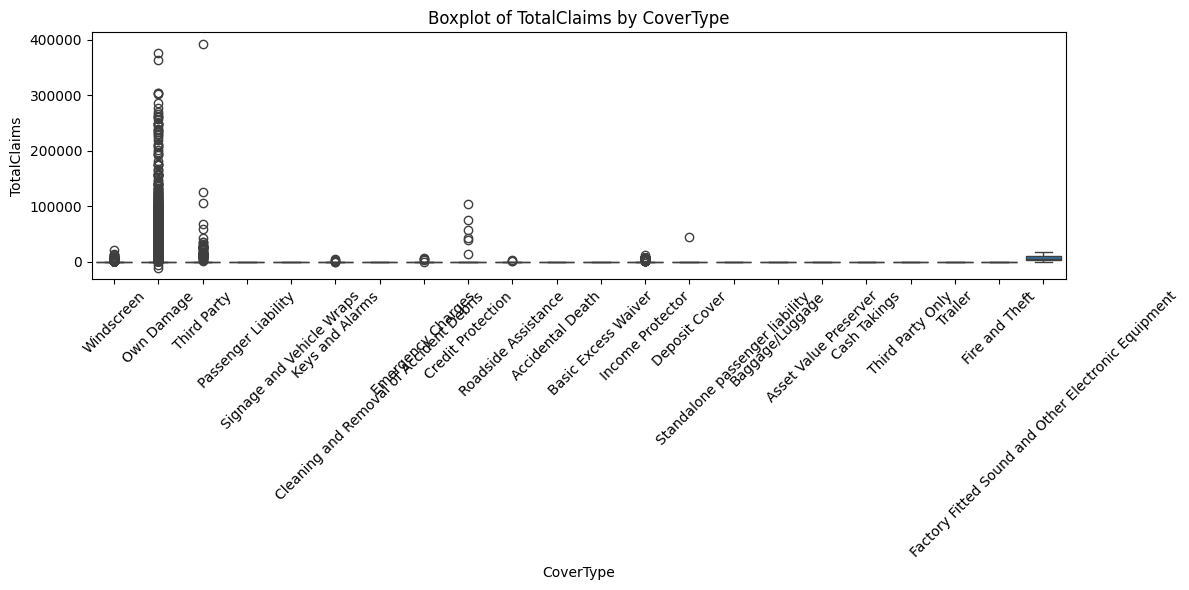

In [3]:
# Load data with proper delimiter

def load_data(filepath: str) -> pd.DataFrame:
    df = pd.read_csv(filepath, delimiter='|')
    df['TotalPremium'] = pd.to_numeric(df['TotalPremium'], errors='coerce')
    df['TotalClaims'] = pd.to_numeric(df['TotalClaims'], errors='coerce')
    return df

# Correlation matrix for selected features

def plot_correlation_matrix(df: pd.DataFrame, columns: list):
    corr = df[columns].corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix")
    plt.tight_layout()
    plt.show()

# Scatterplot by ZipCode or Province

def plot_scatter_by_geography(df: pd.DataFrame):
    plt.figure(figsize=(12, 6))
    sample_df = df.dropna(subset=['TotalPremium', 'TotalClaims']).sample(1000, random_state=42)
    sns.scatterplot(data=sample_df, x='TotalPremium', y='TotalClaims', hue='Province')
    plt.title("TotalPremium vs TotalClaims by Province")
    plt.tight_layout()
    plt.show()

# Boxplot for outlier detection

def plot_boxplots(df: pd.DataFrame, column: str, by: str):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=by, y=column)
    plt.title(f"Boxplot of {column} by {by}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Run functions

if __name__ == "__main__":
    filepath = "../data/MachineLearningRating_v3.txt"
    df = load_data(filepath)

    # Correlation between numeric fields
    numeric_fields = ['TotalPremium', 'TotalClaims']
    plot_correlation_matrix(df, numeric_fields)

    # Scatter by Province
    plot_scatter_by_geography(df)

    # Boxplot of TotalClaims by CoverType
    plot_boxplots(df, 'TotalClaims', 'CoverType')
